<h1 align="center">Handwritten digits classification using ANN and CNN</h1>

In [156]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [135]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [136]:
len(X_train)

60000

In [137]:
len(X_test)

10000

In [138]:
X_train[0].shape

(28, 28)

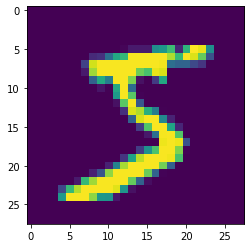

In [139]:
z=plt.imshow(X_train[0])
z

In [140]:
y_train[0]

5

In [141]:
X_train = X_train / 255
X_test = X_test / 255

In [142]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

<h3 >Very simple neural network with no hidden layers</h3>

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4718 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2739 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9256


In [144]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9255


[0.26907896995544434, 0.9254999756813049]

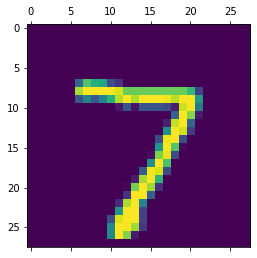

In [145]:
plt.matshow(X_test[0])

In [146]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [147]:
y_predicted.shape

(10000, 10)

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

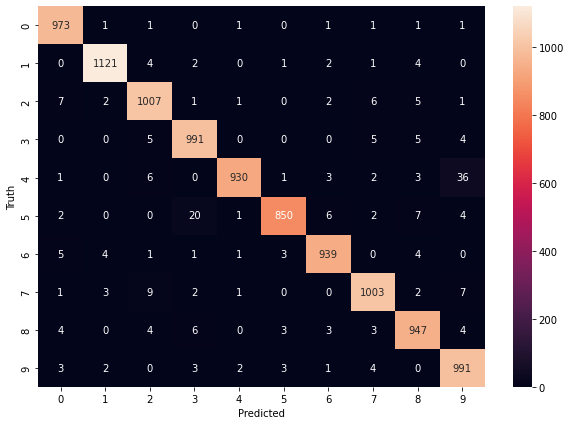

In [154]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**np.argmax finds a maximum element  from an array and returns the index of it**

<h3 >Using hidden layer</h3>

In [149]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2736 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1212 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9844


In [151]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9752


[0.08045167475938797, 0.9751999974250793]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

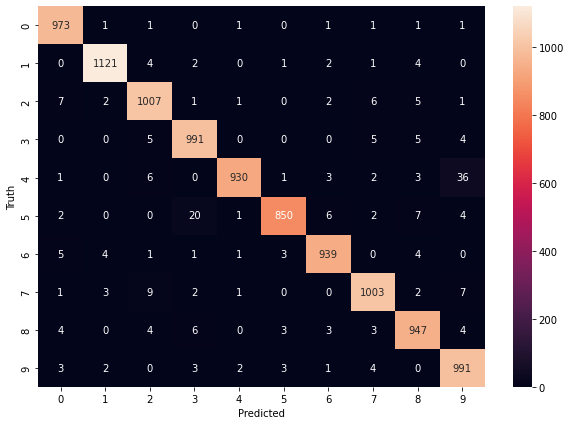

In [152]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [162]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [164]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [165]:
cnn.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1441 - accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0477 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0192 - accuracy: 0.9939


In [166]:
y_predicted_new = cnn.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [167]:
y_predicted_new.shape

(10000, 10)

In [168]:
y_predicted_new_labels = [np.argmax(i) for i in y_predicted_new]

Text(69.0, 0.5, 'Truth')

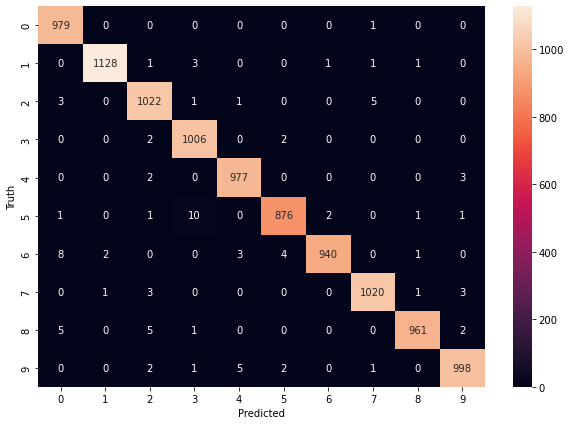

In [169]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_new_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_new_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

